In [1]:
import numpy as np
import pandas as pd

import os
from itertools import zip_longest
from time import time


import umap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import tensorflow as tf



from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing, metrics, model_selection, neural_network, linear_model, ensemble
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [3]:
if os.path.exists('data'):
    train_df = pd.read_csv(os.path.join(os.path.abspath('.'), 
                                        "data", 
                                        "train.csv"))
    test_df = pd.read_csv(os.path.join(os.path.abspath('.'), 
                                        "data", 
                                        "test.csv"))

In [4]:
print(f"Shape of the train_df: {train_df.shape} \nShape of the test_df: {test_df.shape}")

Shape of the train_df: (1760, 172) 
Shape of the test_df: (16626, 172)


In [5]:
#Capturing the columns names
features = list(train_df.columns)

### We note that labels "id", "genus" and "species" are present

In [6]:
features.remove("id")
features.remove("genus")
features.remove("species")

In [7]:
train_df.species.unique()

array(['flammea', 'palustris', 'schoenobaenus', 'scirpaceus', 'caudatus',
       'arvensis', 'pratensis', 'trivialis', 'apus', 'canadensis',
       'alpina', 'europaeus', 'carduelis', 'familiaris', 'chloris',
       'ridibundus', 'monedula', 'livia', 'oenas', 'palumbus', 'corax',
       'corone', 'frugilegus', 'canorus', 'caeruleus', 'urbicum', 'major',
       'martius', 'calandra', 'citrinella', 'schoeniclus', 'rubecula',
       'coelebs', 'atra', 'gallinago', 'chloropus', 'glandarius',
       'stellata', 'ostralegus', 'rustica', 'torquilla', 'lagopus',
       'argentatus', 'cannabina', 'fluviatilis', 'curvirostra',
       'megarhynchos', 'apiaster', 'aguimp', 'flava', 'striata',
       'oriolus', 'domesticus', 'montanus', 'perdix', 'ater', 'apivorus',
       'colchicus', 'phoenicurus', 'collybita', 'sibilatrix', 'trochilus',
       'pica', 'viridis', 'apricaria', 'squatarola', 'modularis',
       'pyrrhula', 'regulus', 'europaea', 'decaocto', 'turtur', 'aluco',
       'vulgaris', 'at

'There are aparently  85 species in the training dataset'

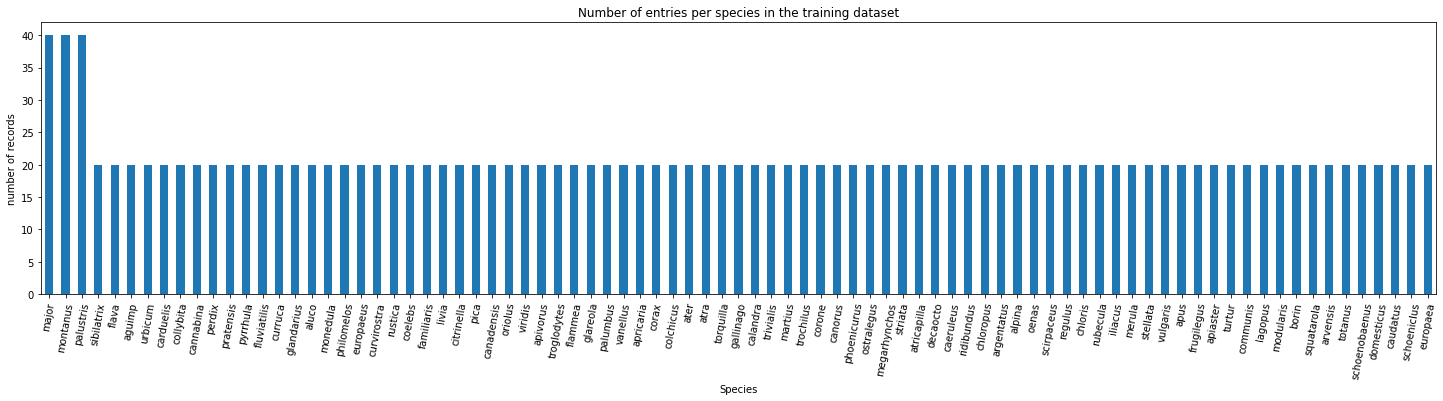

In [8]:
fig, ax = plt.subplots(figsize=(25,5))
train_df['species'].value_counts().plot.bar(ax=ax)
plt.title("Number of entries per species in the training dataset" )
plt.xlabel('Species')
plt.xticks(rotation=80)
plt.ylabel('number of records');
plt.show
f"There are aparently  {len(train_df.species.unique())} species in the training dataset"

##  It looks like there are more than 20 records for species
but closer inpection shows that in fact there are 20 records per each. We must cont the full name for a specie, that is the genus + species

In [9]:
train_df['full_sp_name'] = train_df['genus'] + '_' + train_df['species']
test_df['full_sp_name'] = test_df['genus'] + '_' + test_df['species']

but in fact there are 88 and actually 20 records per specie


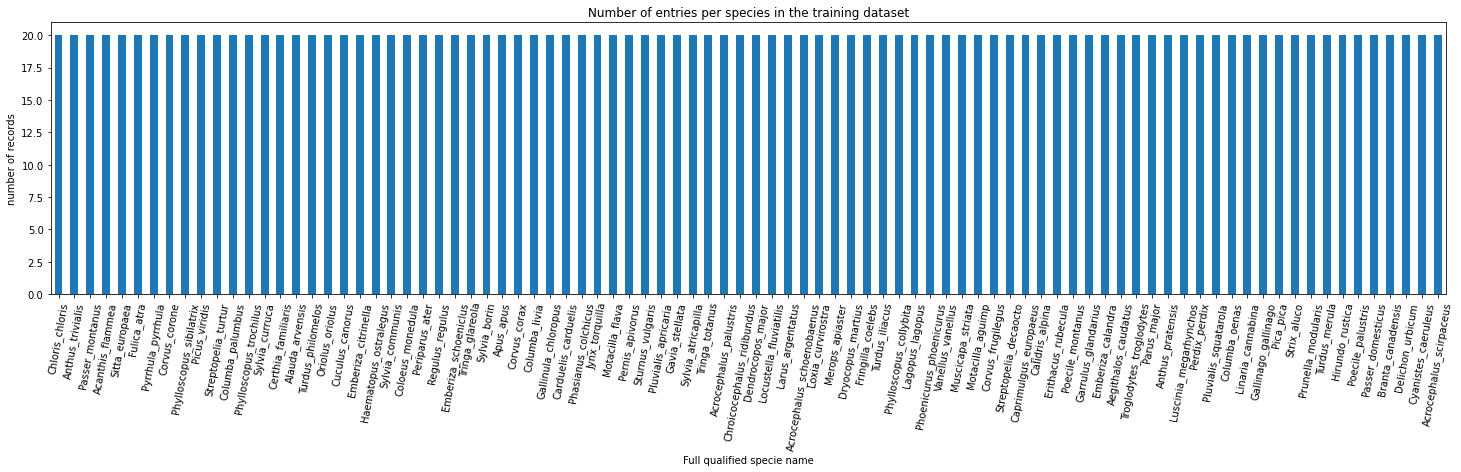

In [10]:
fig, ax = plt.subplots(figsize=(25,5))
train_df['full_sp_name'].value_counts().plot.bar(ax=ax)
plt.title("Number of entries per species in the training dataset" )
plt.xlabel('Full qualified specie name')
plt.xticks(rotation=80)
plt.ylabel('number of records');
plt.show
print(f"but in fact there are {len(train_df.full_sp_name.unique())} and actually 20 records per specie" )

## Inspect Genera distribution

'There are 66 different genus in the training dataset'

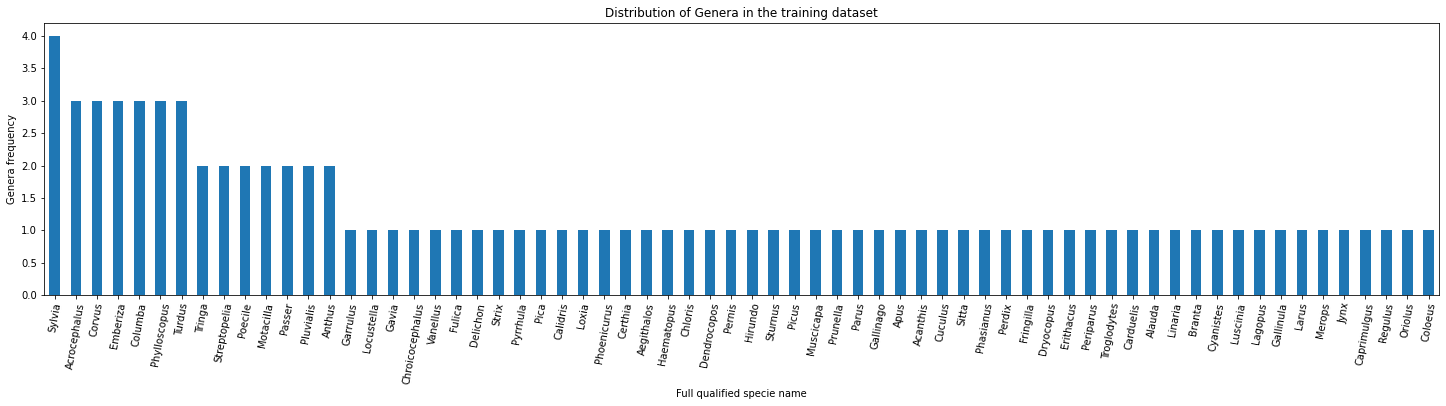

In [11]:
fig, ax = plt.subplots(figsize=(25,5))
(train_df['genus'].value_counts()/20).plot.bar(ax=ax)# Diveide by number of records
plt.title("Distribution of Genera in the training dataset" )
plt.xlabel('Full qualified specie name')
plt.xticks(rotation=80)
plt.ylabel('Genera frequency');
plt.show
f"There are {len(train_df.genus.unique())} different genus in the training dataset"

## Scale/standarize dataset and encode the label

In [12]:
scaler = preprocessing.StandardScaler()# Declare an instance of the transformer/scaler
scaler.fit(train_df[features])# Compute the transformation

train_df[features] = pd.DataFrame(scaler.transform(train_df[features]), columns=features)# Transform (scale) the features on the train_df
test_df[features] = pd.DataFrame(scaler.transform(test_df[features]), columns=features)# Transform (scale) the features on the test_df

X = train_df[features].values
y_raw = train_df['full_sp_name'].values

le = preprocessing.LabelEncoder()# *** Help normalize labels (numeric or in this case strings) such that they contain only values between 0 and n_classes-1

y = le.fit_transform(y_raw)# Transform autput labels to numeric values.

X_test = test_df[features].values
y_raw_test = test_df['full_sp_name'].values

y_test = le.transform(y_raw_test)



In [13]:
X.shape

(1760, 169)

In [14]:
y_raw.shape

(1760,)

## Use PCA to show the dataset in a reduced space dimension

Explained variance ratio:  [0.198 0.115 0.106 0.064 0.045 0.038 0.028 0.022 0.020 0.019 0.017 0.016
 0.015 0.014 0.014 0.012 0.011 0.010 0.010 0.009 0.009 0.008 0.008 0.008
 0.007 0.007 0.006 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.004
 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003 0.003 0.003
 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000

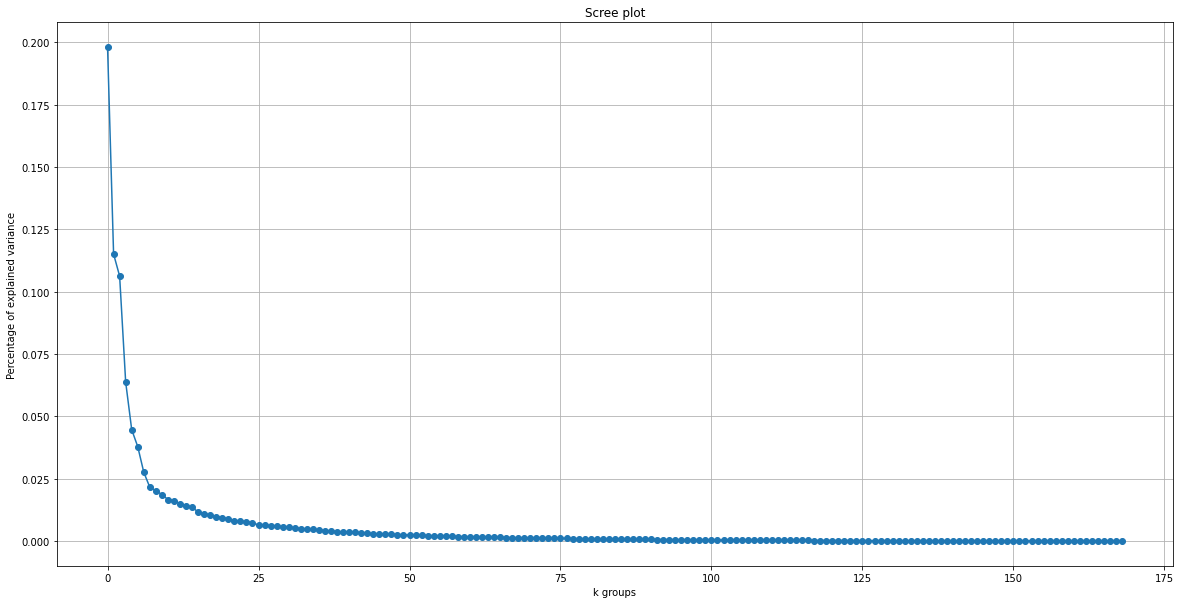

In [15]:
pca=PCA()
pca.fit(X)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_,'-o')
plt.title('Scree plot')
plt.ylabel('Percentage of explained variance')
plt.xlabel('k groups')
plt.grid()
print('Explained variance ratio: ' ,pca.explained_variance_ratio_)
plt.show()

## Embedding the firts two components of the PCA

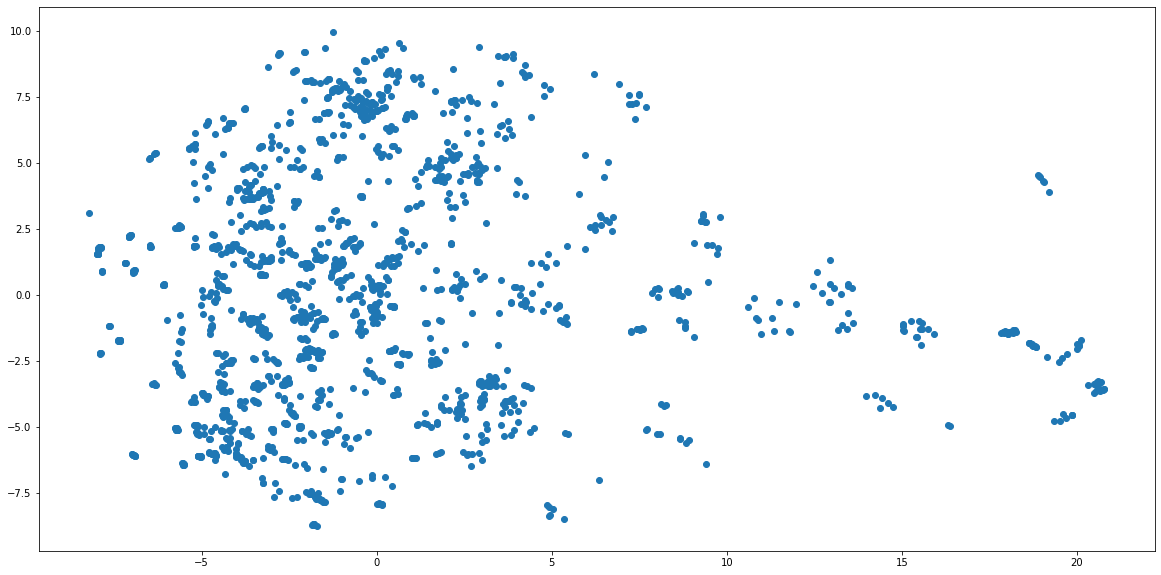

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
X_pca = pca.transform(X)
plt.plot(X_pca[:,0],X_pca[:,1],'o')

## Use umap (UMAP) to show the dataset in a reduced space dimension

#### Use a helper function to visualize various parameters

In [17]:
def draw_umap(n_neighbors=15, min_dist=0.1, 
              n_components=2, metric='euclidean', 
              title='', 
              plot_indx1 = 4, plot_indx2 = 4, plot_grid_size = 1, 
              font_s = 20,
              scat_s = 10):
    
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=9991
        
    )
    
    t0 = time()
    u = fit.fit_transform(X);
    t1 = time()

    if n_components == 1:
        ax = fig.add_subplot(plot_indx1, plot_indx2, plot_grid_size)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(plot_indx1, plot_indx2, plot_grid_size)
        ax.scatter(u[:,0], u[:,1], s=scat_s)
    if n_components == 3:
        ax = fig.add_subplot(plot_indx1, plot_indx2, plot_grid_size, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  s=scat_s)
    plt.title(title + f"\nelapsed time: {t1 - t0:.2f}", fontsize=font_s)


### Exploring different neighbors and minimal distance (hyperparameter landscape)

#### Extractting 2 components

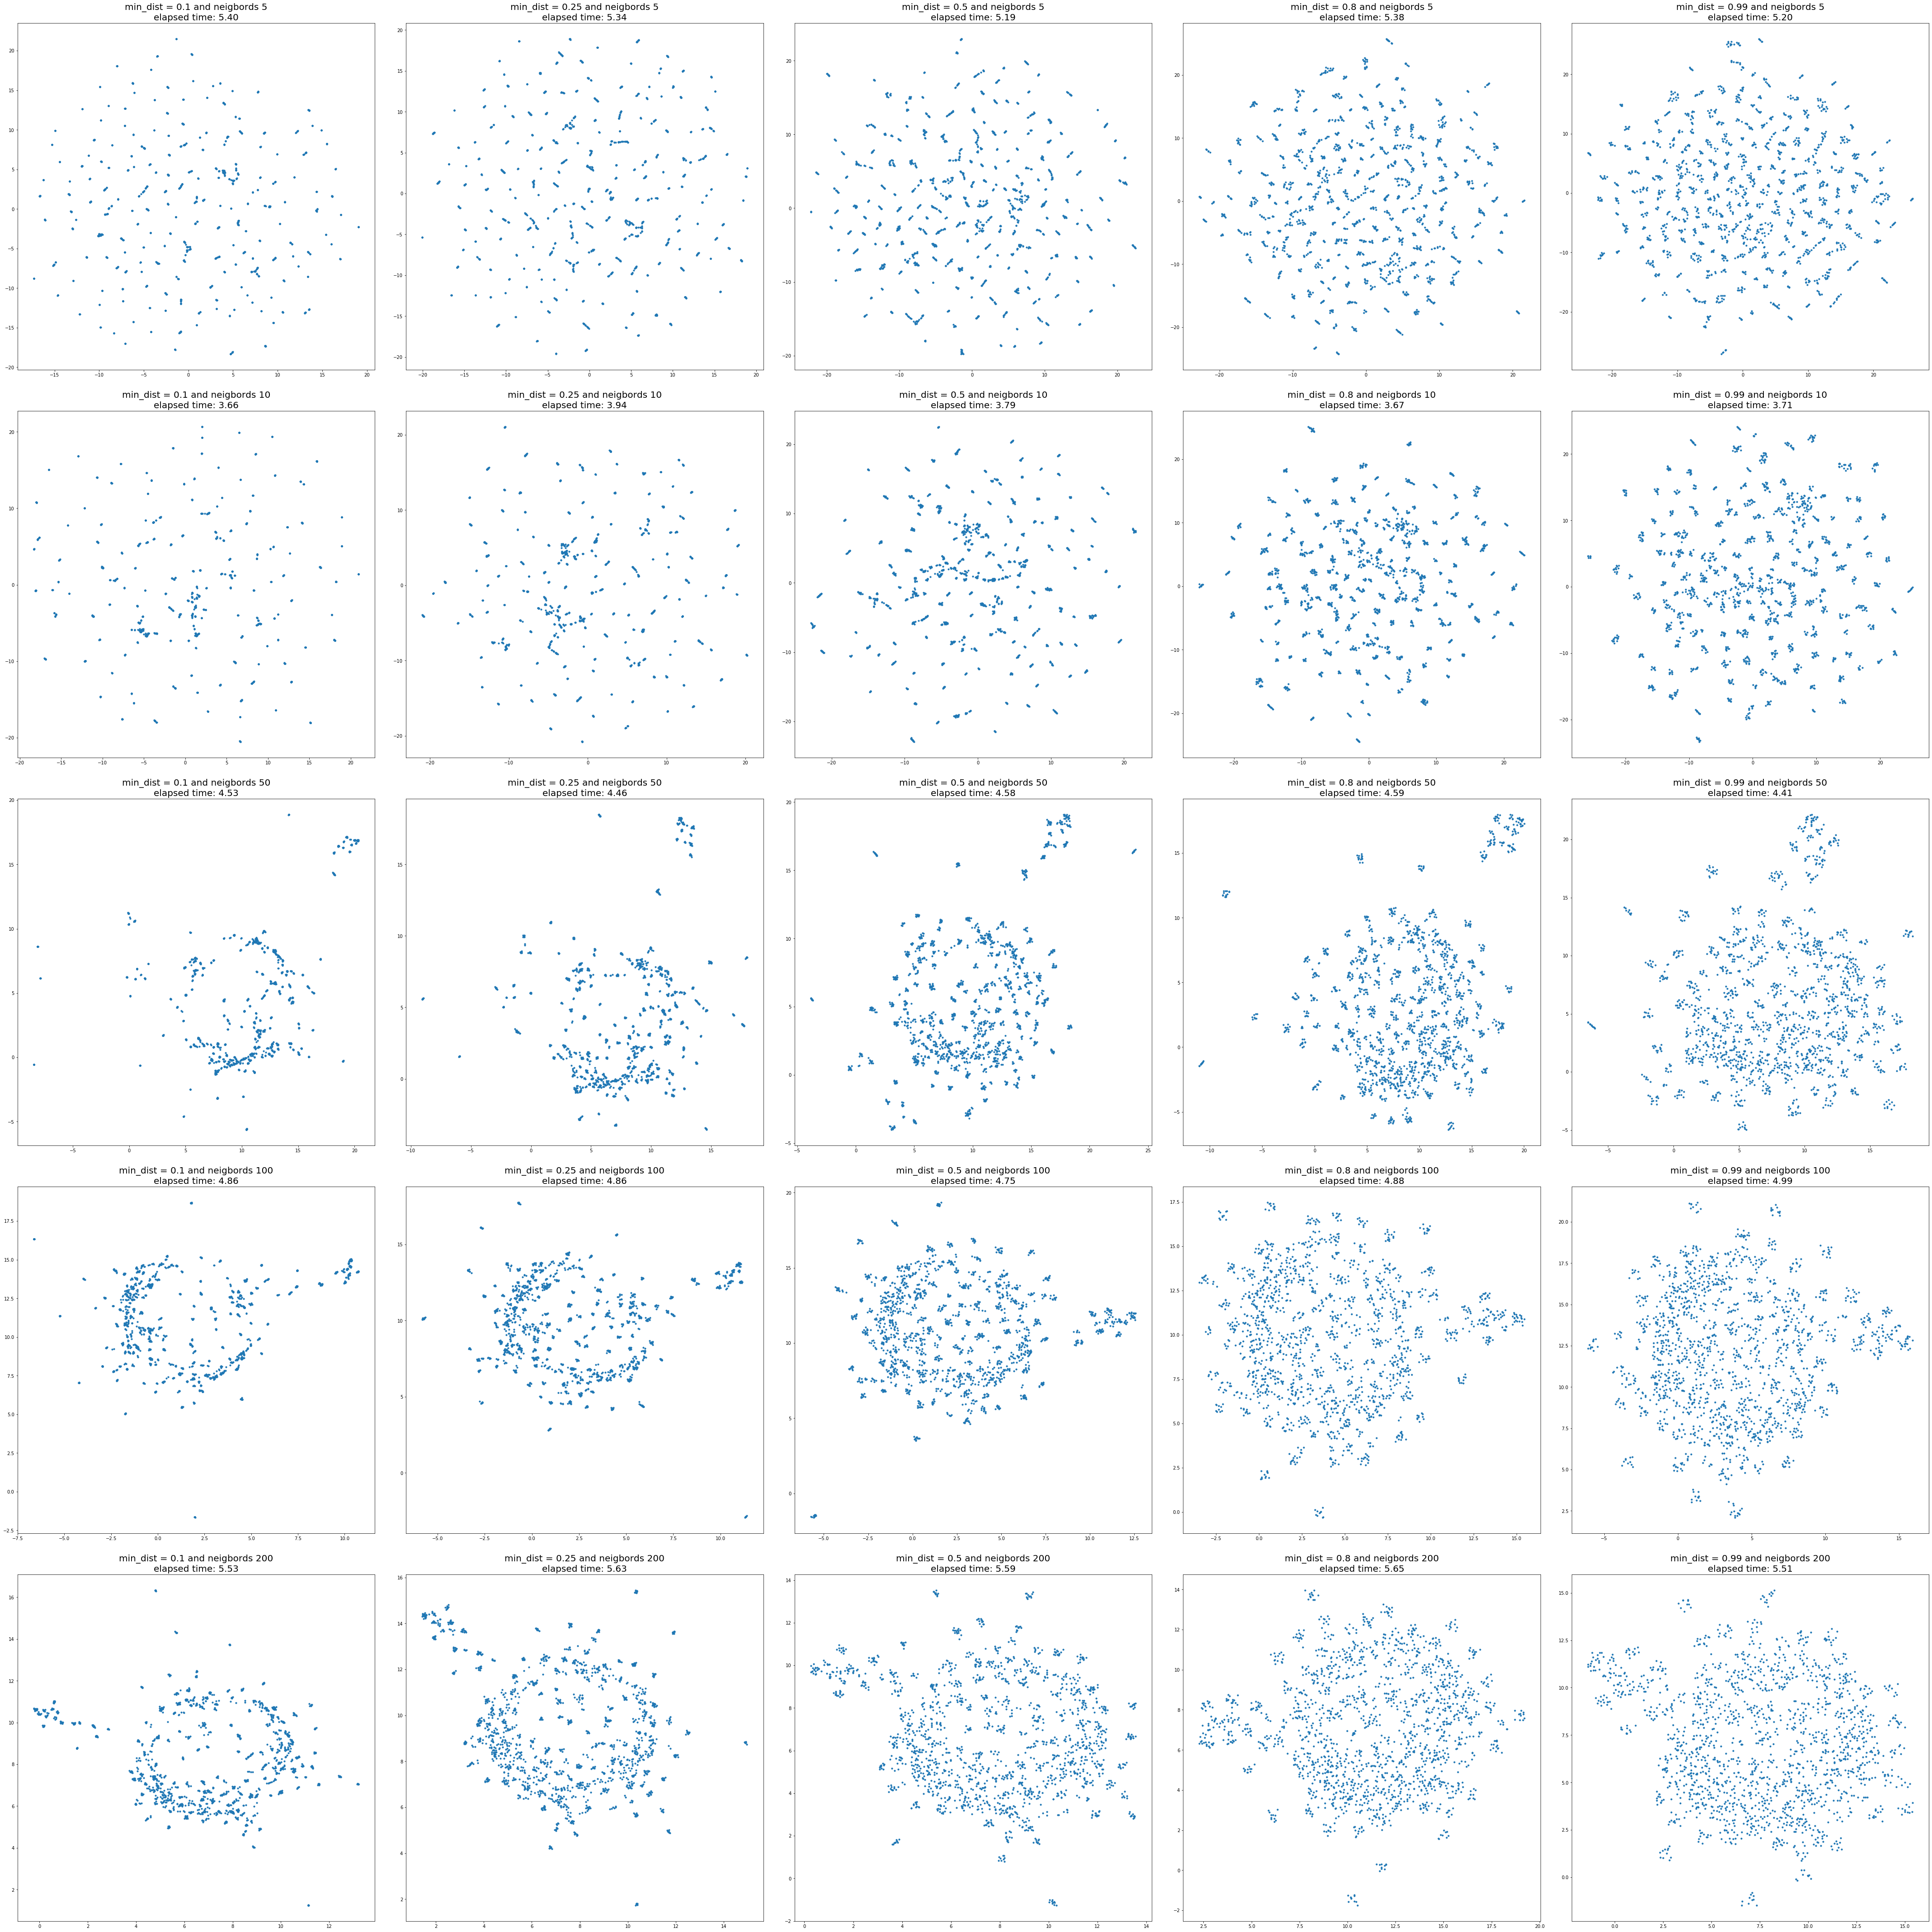

In [24]:
# Run me only locally
components = 2
neigbords = [5, 10, 50, 100, 200]
distance = [0.1, 0.25, 0.5, 0.8, 0.99]

fig_Count = 0
nrows, ncols = len(neigbords), len(distance)

fig = plt.figure(figsize=(60, 60))

for indx1, n  in enumerate(neigbords, start=1):
    for indx2, d in enumerate(distance, start=1):
        fig_Count += 1
#         print(f"this is my neigb: {i} and this is my distance {j} and index1: {indx1} and index2: {indx2}")
        draw_umap(min_dist=d, 
                     n_neighbors=n,
                     n_components= components, 
                     title=f'min_dist = {d} and neigbords {n}',
                     plot_indx1 = nrows, plot_indx2 = ncols, plot_grid_size = fig_Count)

fig.tight_layout(pad=3)

## Use TSNE to show the dataset in a reduced space dimension

#### Use a helper function to visualize various parameters

In [18]:
def draw_TSNE(n_perplex=125, 
              learn_rate=200, 
              early_exag=4.0,
              init='pca',
              n_itera=1000, 
              metric='euclidean', 
              verbo=100,
              title='', 
              plot_indx1 = 4, plot_indx2 = 4, plot_grid_size = 1, 
              font_s = 20,
              scat_s = 10):
    
    
    fit = TSNE(perplexity=n_perplex, 
               learning_rate=learn_rate, 
               early_exaggeration=early_exag,
               init=init,
               n_iter=n_itera, 
               random_state=9999991, 
               metric=metric, 
               verbose=0 )
    
    t0 = time()
    u = fit.fit_transform(X);
    t1 = time()

    ax = fig.add_subplot(plot_indx1, plot_indx2, plot_grid_size)
    ax.scatter(u[:,0], u[:,1], s=scat_s)
    
    plt.title(title + f"\nelapsed time: {t1 - t0:.2f}", fontsize=font_s)


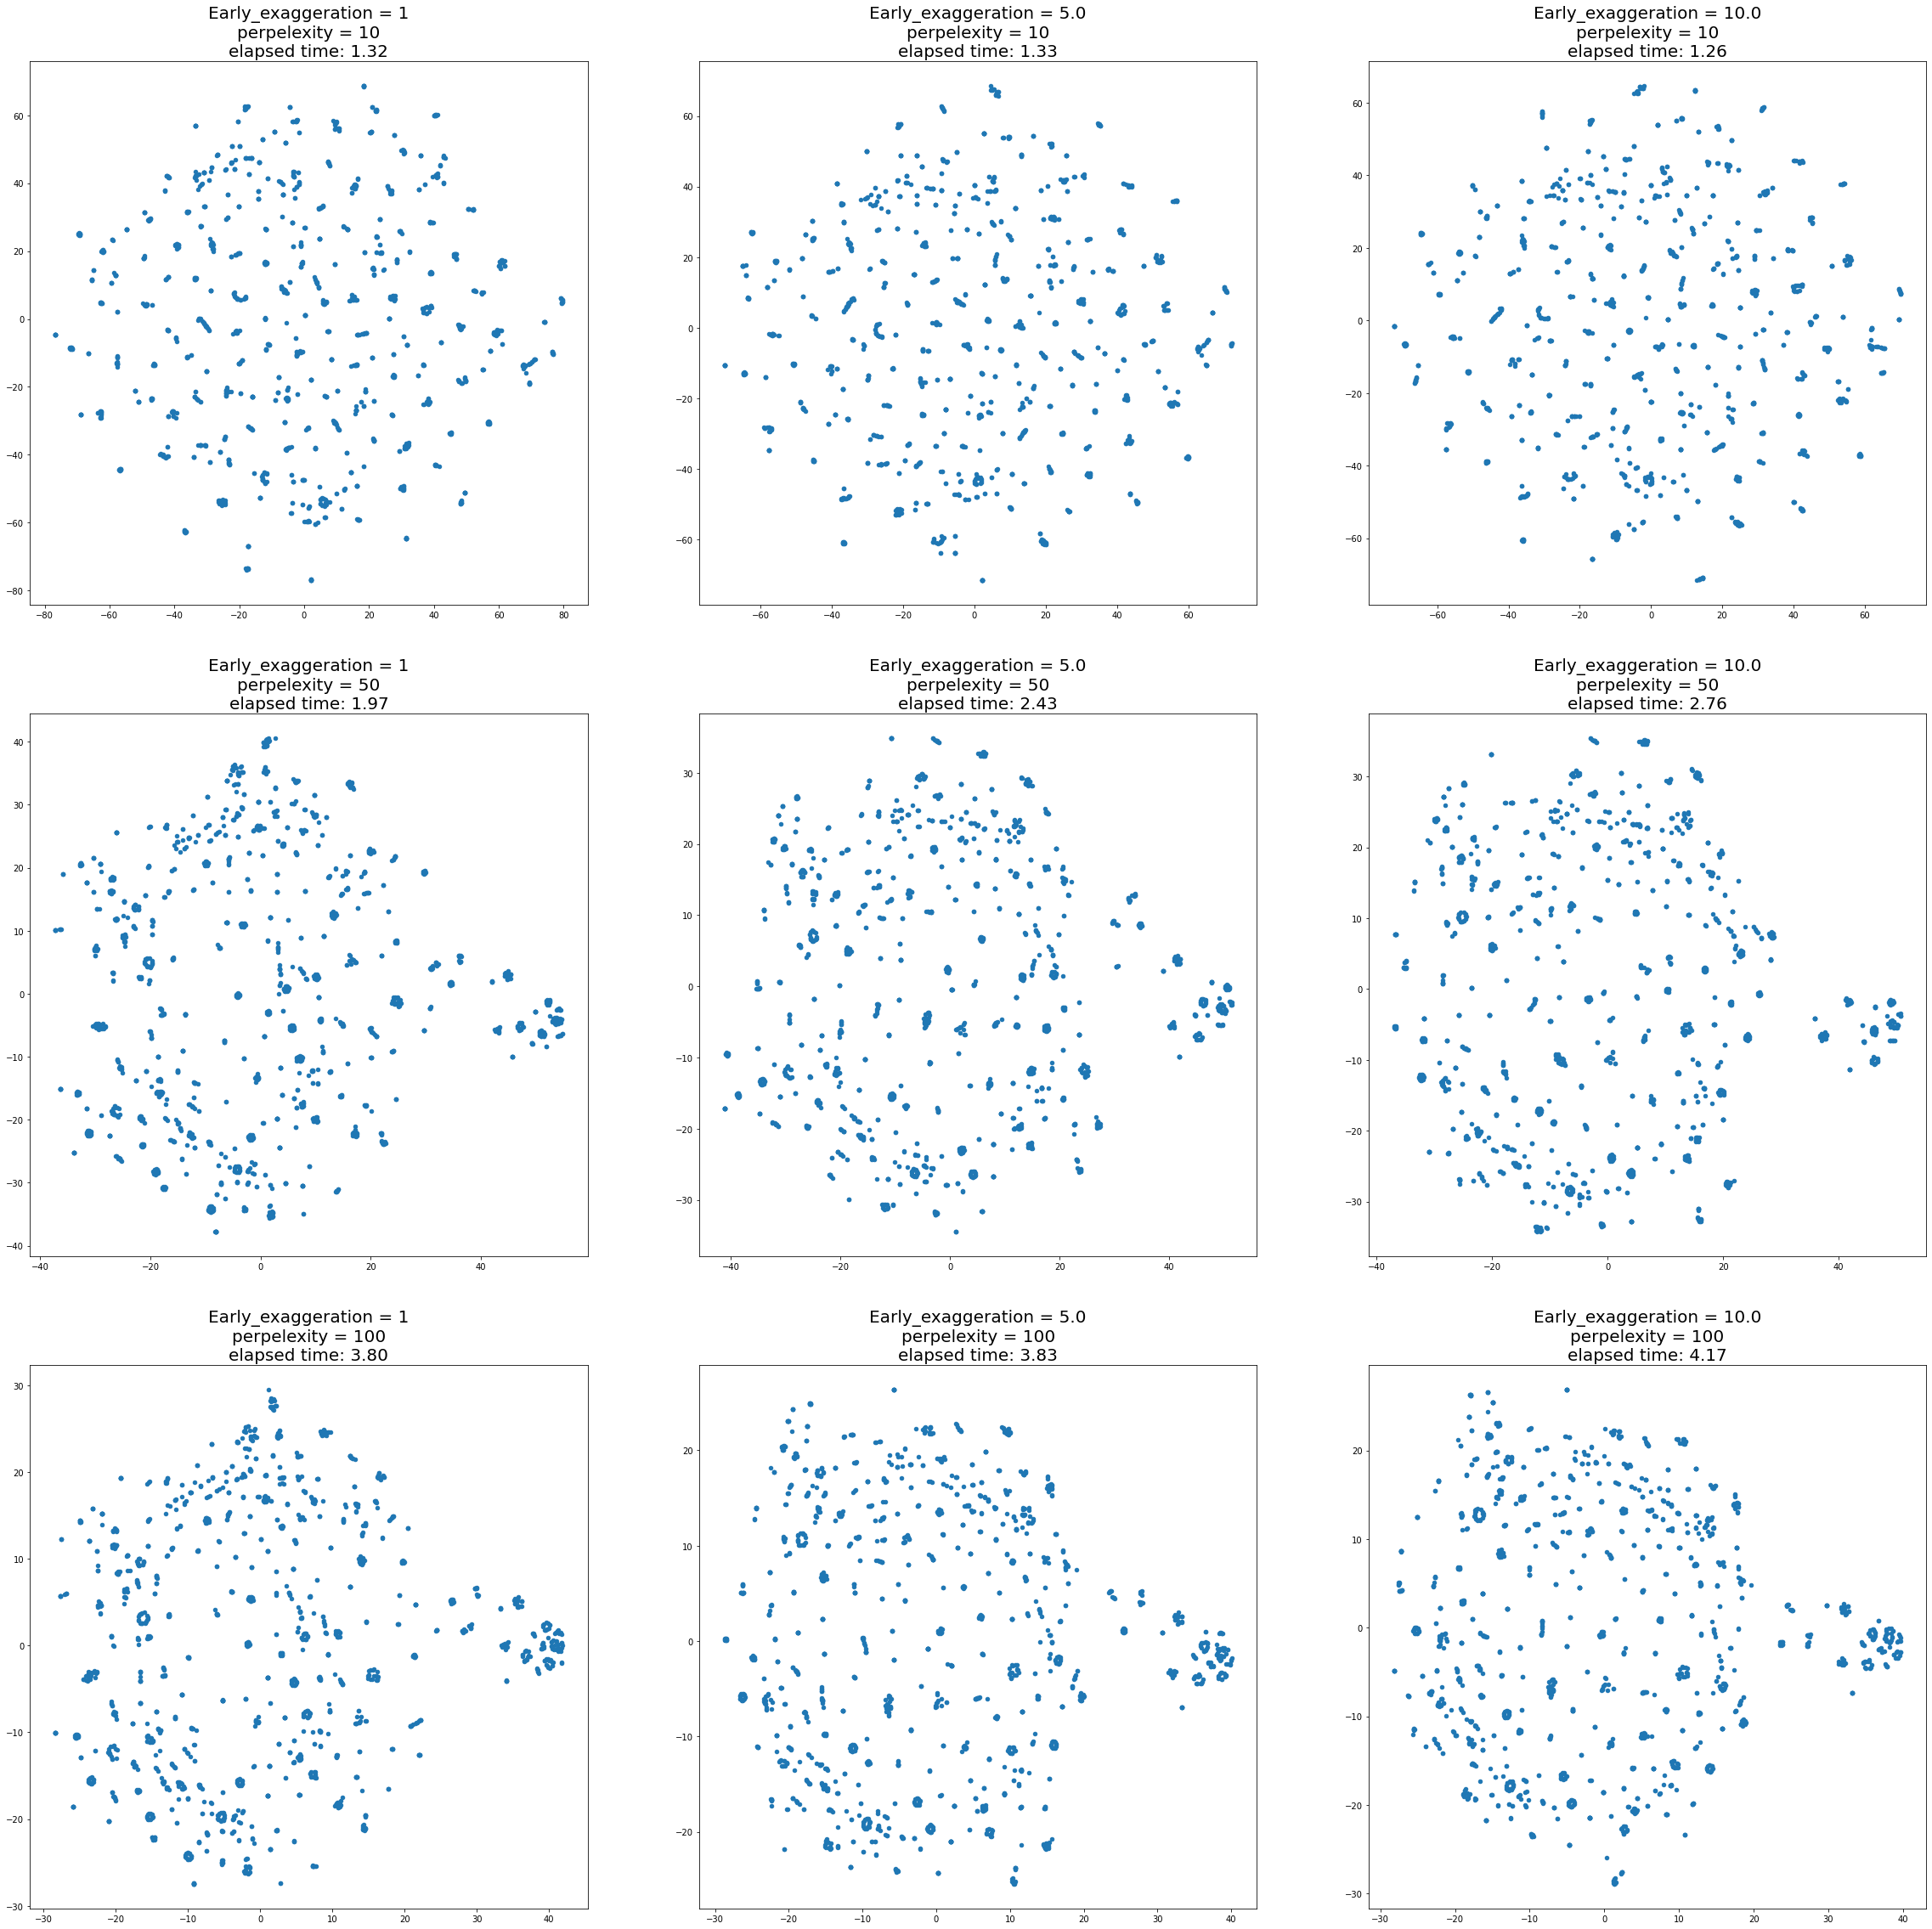

In [19]:
# Run me only locally

learning_rate=200
itera=500

perplexity=[10, 50, 100]
exagg=[1, 5.0, 10.0]



fig_Count = 0
nrows, ncols = len(perplexity), len(exagg)

fig = plt.figure(figsize=(40, 40))

for indx1, p  in enumerate(perplexity, start=1):
    for indx2, e in enumerate(exagg, start=1):
        fig_Count += 1
#         print(f"this is my neigb: {i} and this is my distance {j} and index1: {indx1} and index2: {indx2}")
        draw_TSNE(n_perplex=p, 
                  learn_rate=learning_rate, 
                  early_exag=e,
                  n_itera=itera,
                  title=f'Early_exaggeration = {e}\nperpelexity = {p}',
                  plot_indx1 = nrows, plot_indx2 = ncols, plot_grid_size = fig_Count,
                  font_s = 20, scat_s = 20)



## Exploring the numbers of clusters via K-means

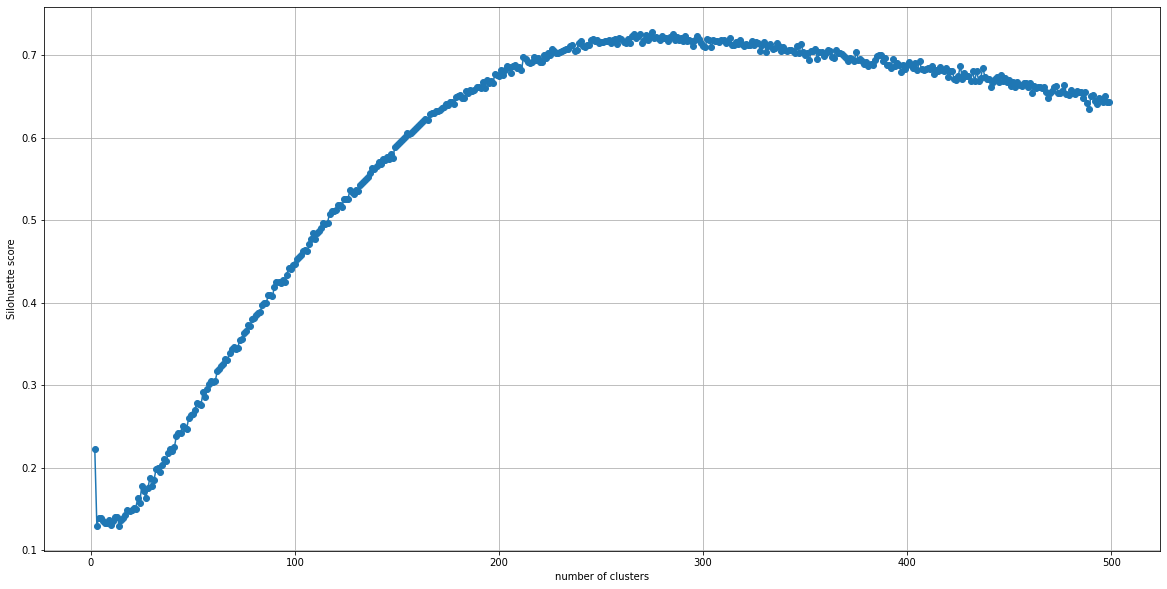

In [20]:
# Run me only locally

plt.figure(figsize=(20, 10))
scores=[]
clusters = 500


for itrial in range(2,clusters):
#     print('Number of clusters considered: ',itrial)
    clusterer = KMeans(n_clusters=itrial, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    score=silhouette_score(X,cluster_labels)
    scores.append(score)
    
plt.grid()
plt.plot(np.arange(len(scores))+2,np.array(scores),'-o')
plt.ylabel('Silohuette score');
plt.xlabel('number of clusters');

### Assesing Gaussian mixture for classification

In [ ]:
# # No need to run this code
# n_rows, n_cols = list(range(1, 5)), list(range(1, 5))
# start, end = 80, 96

# aic=[]
# bic=[]
# sil=[]

# scat_s = 20
# font_s = 20
# fig = plt.figure(figsize=(60, 60))

# for indx, i_comp in enumerate(range(start, end), start = 1):
#     ax = fig.add_subplot(len(n_rows), len(n_cols), indx)
    
#     clf =  GaussianMixture(n_components=i_comp, covariance_type='full')
    
    
# #     u = clf.fit_transform(X);
    
#     t0 = time()
#     clf.fit(X)
#     cluster_labels=clf.predict(X)
#     t1 = time()
    
#     ax.scatter(X[:,0], X[:,1], c = cluster_labels, s = scat_s)
#     plt.title(f"components: {i_comp}\nelapsed time :{t1 - t0:.2f}\nIC: {clf.aic(X):.2f}\nBIC: {clf.bic(X):.2f}\nSilhouette_score: {silhouette_score(X,cluster_labels):.2f}", fontsize = font_s)
    


In [ ]:
# plt.figure(figsize=(20, 10))
# scat_s = 20
# font_s = 20
# i_comp = 85
    
# clf =  GaussianMixture(n_components=i_comp, covariance_type='full')
    
    
# # u = clf.fit_transform(X);
    
# t0 = time()
# clf.fit(X)
# cluster_labels=clf.predict(X)
# t1 = time()


# plt.scatter(X[:,0], X[:,1], c = cluster_labels, s = scat_s)
# plt.title(f"components: {i_comp}\nelapsed time :{t1 - t0:.2f}\nIC: {clf.aic(X):.2f}\nBIC: {clf.bic(X):.2f}\nSilhouette_score: {silhouette_score(X,cluster_labels):.2f}", fontsize = font_s)

### Plot the Gaussian mixture performance

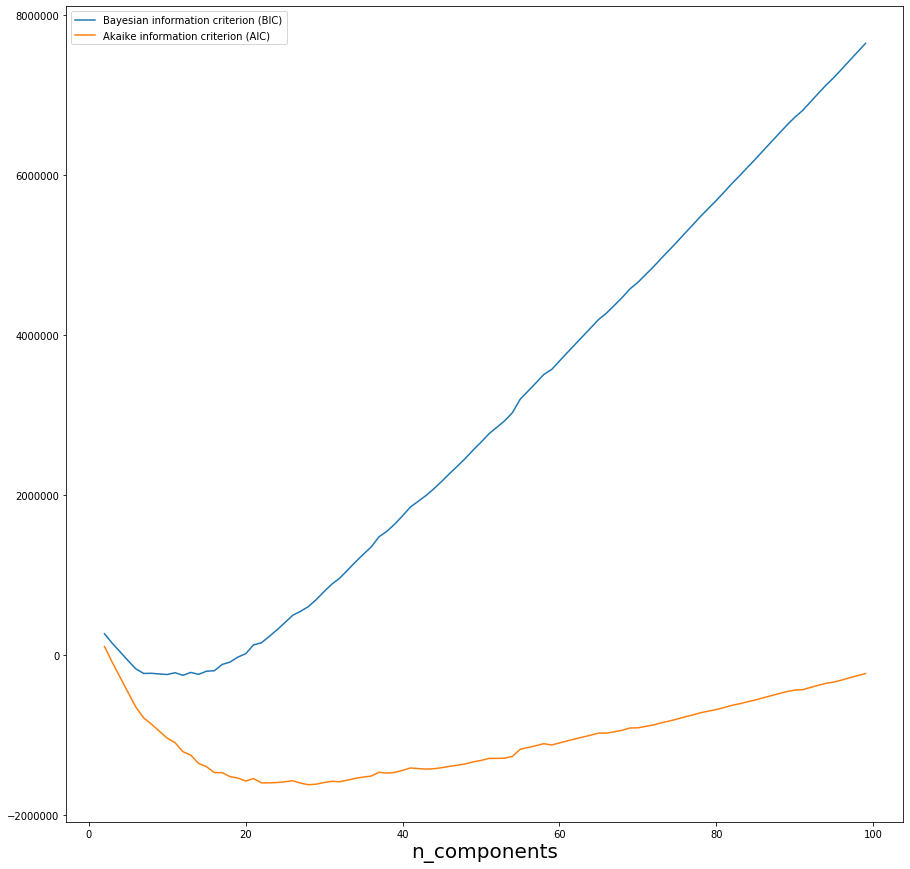

In [77]:
plt.figure(figsize=(15, 15))
scat_s = 20
font_s = 20

n_components = np.arange(2, 100, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='Bayesian information criterion (BIC)')
plt.plot(n_components, [m.aic(X) for m in models], label='Akaike information criterion (AIC)')
plt.legend(loc='best')
plt.xlabel('n_components', fontsize = font_s);



### Build and compare 3 models:
1. logisteic regression, 
2. Random Forest
3. Forward neural network


In [27]:
scaler = preprocessing.StandardScaler()# Declare an instance of the transformer/scaler
scaler.fit(train_df[features])# Compute the transformation

train_df[features] = pd.DataFrame(scaler.transform(train_df[features]), columns=features)# Transform (scale) the features on the train_df
test_df[features] = pd.DataFrame(scaler.transform(test_df[features]), columns=features)# Transform (scale) the features on the test_df

X = train_df[features].values
y_raw = train_df['full_sp_name'].values

le = preprocessing.LabelEncoder()# *** Help normalize labels (numeric or in this case strings) such that they contain only values between 0 and n_classes-1

y = le.fit_transform(y_raw)# Transform autput labels to numeric values.

X_test = test_df[features].values
y_raw_test = test_df['full_sp_name'].values

y_test = le.transform(y_raw_test)



In [29]:
# As we can see there are very noticeable clusters let's see if some model can learn to distinguish between the species

sss = model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.2)

log_reg_accs = []
log_reg_ap = []
log_reg_f1 = []
log_reg_preds = np.zeros((5,len(X_test)))

rand_forest_accs = []
rand_forest_ap = []
rand_forest_f1 = []
rand_forest_preds = np.zeros((5,len(X_test)))

nn_accs = []
nn_ap = []
nn_f1 = []
nn_preds = np.zeros((5,len(X_test)))

i = 0

for train_index, val_index in sss.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    log_reg = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
    log_reg.fit(X_train, y_train)
    y_val_pred = log_reg.predict(X_val)
    log_reg_accs.append(metrics.accuracy_score(y_val_pred, y_val))
    log_reg_preds[i] = log_reg.predict(X_test)
    
    rand_forest = ensemble.RandomForestClassifier(n_estimators=100)
    rand_forest.fit(X_train, y_train)
    y_val_pred = rand_forest.predict(X_val)
    rand_forest_accs.append(metrics.accuracy_score(y_val_pred, y_val))
    rand_forest_preds[i] = rand_forest.predict(X_test)
    
    
    nn = neural_network.MLPClassifier(activation='relu',hidden_layer_sizes=[128,128])
    nn.fit(X_train, y_train)
    y_val_pred = nn.predict(X_val)
    nn_accs.append(metrics.accuracy_score(y_val_pred, y_val))
    nn_preds[i] = nn.predict(X_test)
    
    i += 1
    
print("Accuracy of Logistic Regression on validation set: ", np.mean(log_reg_accs))
print("Accuracy of Random Forest on validation set: ", np.mean(rand_forest_accs))
print("Accuracy of Feed Forward Neural Network on validation set: ", np.mean(nn_accs))

/Users/rubencito/.pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rubencito/.pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Accuracy of Logistic Regression on validation set:  0.9710227272727273
Accuracy of Random Forest on validation set:  0.9818181818181818
Accuracy of Feed Forward Neural Network on validation set:  0.9693181818181819


# Building a neural network with tensor flow

In [52]:
for i in range(5, 20):
    print(2**i)

32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288


In [60]:
print(f"dim of X train: {X.shape}\ndim of X test: {X_test.shape}")

dim of X train: (1760, 169)
dim of X test: (16626, 169)


In [113]:
del model_1

NameError: name 'model_1' is not defined

In [114]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1024, activation='relu', name="layer1", input_shape=(169,)),
    tf.keras.layers.Dense(512, activation='relu', name="layer2"),
    tf.keras.layers.Dense(256, activation='relu', name="layer3"),
    tf.keras.layers.Dense(88, activation='softmax', name="layer4")
    ])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
model_1.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1024)              174080    
_________________________________________________________________
layer2 (Dense)               (None, 512)               524800    
_________________________________________________________________
layer3 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer4 (Dense)               (None, 88)                22616     
Total params: 852,824
Trainable params: 852,824
Non-trainable params: 0
_________________________________________________________________


### Model training

In [116]:
save_path = 'save/nn_model_bird_class_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model_1.fit(X, y,
                 epochs=15, batch_size=128, 
                 validation_data=(X_test, y_test),#this has to be a tupple () not a list [] 
                 callbacks=[save_callback])

Epoch 1/15
14/14 [==============================] - 1s 31ms/step - loss: 3.7583 - accuracy: 0.2581 - val_loss: 1.4485 - val_accuracy: 0.7517
Epoch 2/15
14/14 [==============================] - 0s 22ms/step - loss: 0.9452 - accuracy: 0.8486 - val_loss: 0.5130 - val_accuracy: 0.9148
Epoch 3/15
14/14 [==============================] - 0s 22ms/step - loss: 0.2524 - accuracy: 0.9554 - val_loss: 0.3896 - val_accuracy: 0.9337
Epoch 4/15
14/14 [==============================] - 0s 22ms/step - loss: 0.1098 - accuracy: 0.9789 - val_loss: 0.2656 - val_accuracy: 0.9480
Epoch 5/15
14/14 [==============================] - 0s 23ms/step - loss: 0.0633 - accuracy: 0.9852 - val_loss: 0.2039 - val_accuracy: 0.9502
Epoch 6/15
14/14 [==============================] - 0s 23ms/step - loss: 0.0223 - accuracy: 0.9964 - val_loss: 0.1800 - val_accuracy: 0.9666
Epoch 7/15
14/14 [==============================] - 0s 22ms/step - loss: 0.0134 - accuracy: 0.9984 - val_loss: 0.1270 - val_accuracy: 0.9772
Epoch 8/15
14

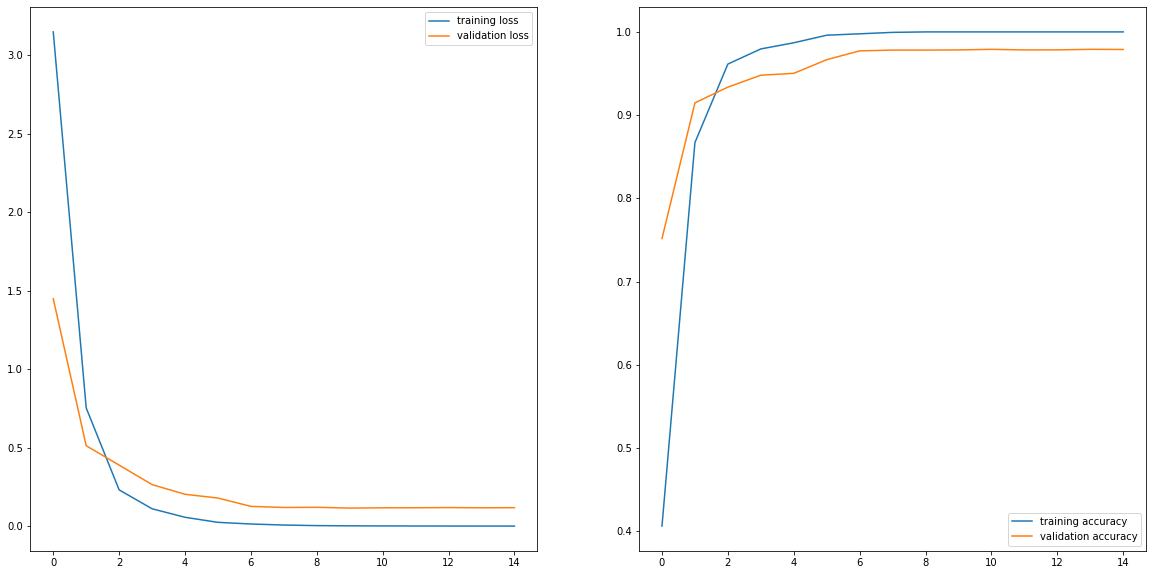

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()